In [13]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from collections import OrderedDict
import pylab
import seaborn as sns
import scipy.stats as stats
import math
import json

import sympy as sp
sp.init_printing() 

In [154]:
def parse_file(file_path):
    all_lines = []
    with open(file_path) as file:
        for line in file:
            all_lines.append(line.strip())


    records = []
    for i in np.arange(len(all_lines)):
        if (all_lines[i] == '{'):
            start = i
            while (all_lines[i] != '}'):
                i+=1

            end = i+1
            record_lines = all_lines[start: end]
            record_str = ''.join(record_lines)

            record = json.loads(record_str)

            records.append(record)

    return records

def get_mean(file_path):
    x = []
    y = []
    theta = []
    
    records = parse_file(file_path)
    
    for _, record in enumerate(records):
        x.append(record['position'][0])
        y.append(record['position'][1])
        theta.append(record['orientation'][0])
        
    return np.mean(x), np.mean(y), np.mean(theta)

def get_measurements(size, direction):
    df = pd.DataFrame(columns=['x', 'y', 'theta'])
    
    for ind in np.arange(20):
        file_path = './log-data/{}_{}_{:02d}.txt'.format(size.lower(), direction.lower(), ind)
        x,y,theta = get_mean(file_path)
        df = df.append({'x':x, 'y':y, 'theta':theta}, ignore_index=True)
    return df

def plot_pose(point, angle, marker,color, length=0.5, label = ""):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = y+(length * math.sin(angle))
    endx = x+(length * math.cos(angle))
    
    plt.plot([x, endx], [y, endy],color = color,label=label + ' pose')
    
def plot_data(df, gt_end, title=''):
    # measured pose
    plt.scatter(df.x.values, df.y.values, marker='o', color='y')
    for index, row in df.iterrows():
        plot_pose((row['x'], row['y']), angle=row['theta'], marker='o', color='y', label = 'Observed')

    # end pose
    plt.scatter(gt_end[0], gt_end[1], marker='o', color='r')
    plot_pose(point=(gt_end[0], gt_end[1]), angle=gt_end[2],marker='o',color='r',label = 'Expected')
    
    # Initial pose
    plt.scatter(-85.41, -55.60, marker='o', color='g')
    plot_pose(point=(-85.41, -55.60), angle=1.38,marker='o',color='g',label = 'Initial')

    plt.rcParams["figure.figsize"] = (16,8)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title(title)
    plt.xlabel("X-axis (cm)")
    plt.ylabel("Y-axis (cm)")
    plt.grid(True)
    plt.show()

In [157]:
poles = ['small', 'medium', 'large']
directions = ['straight', 'left', 'right']
gt = [[-86.89, -71.31, 1.45], [-45.47, -45.00, 0.88], [-112.13, -70.58, 1.78]]

df_all = pd.DataFrame(columns=['size', 'direction', 'x', 'y', 'theta'])

for _, pole in enumerate(poles):
    for ind, direction in enumerate(directions):
        df = get_measurements(pole, direction)
        
        # Save data
        output_path = './pre-processed/{}_{}.csv'.format(pole, direction)
        df.to_csv(output_path)
        
        x_mean = np.mean(df.x.values)
        y_mean = np.mean(df.y.values)
        theta_mean = np.mean(df.theta.values)
        
        df_all = df_all.append({'size': pole, 'direction': direction, 'x': x_mean, 'y': y_mean, 'theta': theta_mean}, ignore_index=True)
        
        # Plot data
        #title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
        #plot_data(df, (gt[ind][0], gt[ind][1], gt[ind][2]), title)
        
df_all.to_csv('./pre-processed/all.csv')

In [171]:
# ground truth
gt = [[-86.89, -71.31, 1.45], [-45.47, -45.00, 0.88], [-112.13, -70.58, 1.78]]

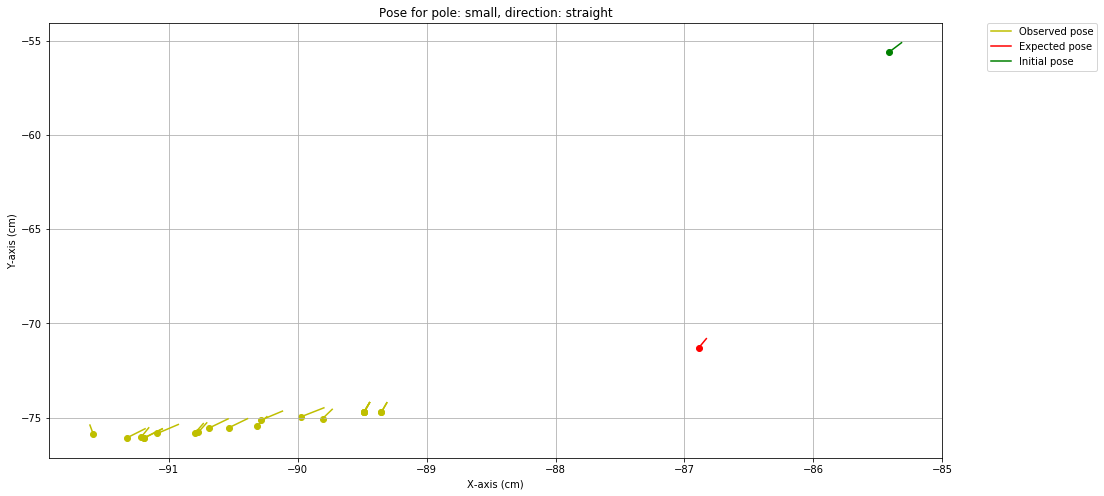

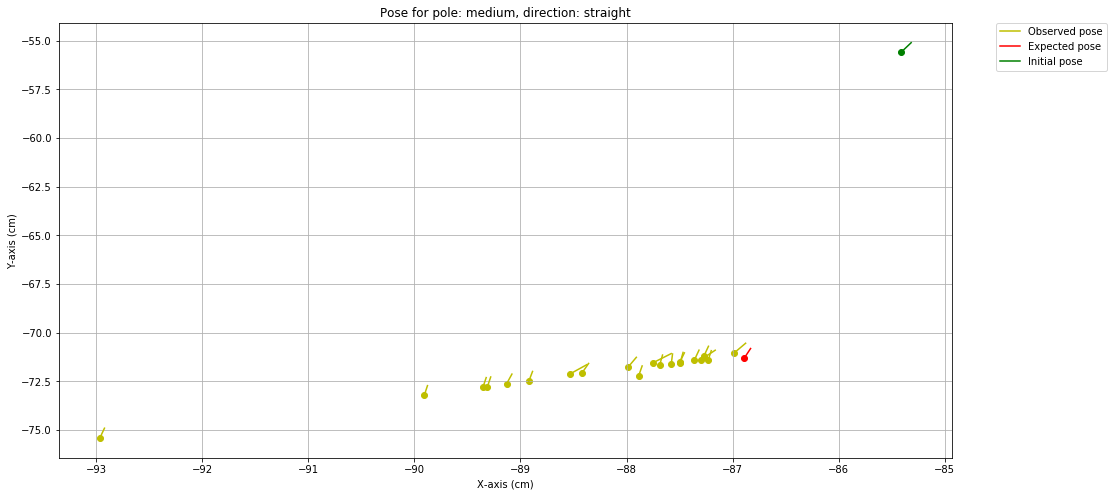

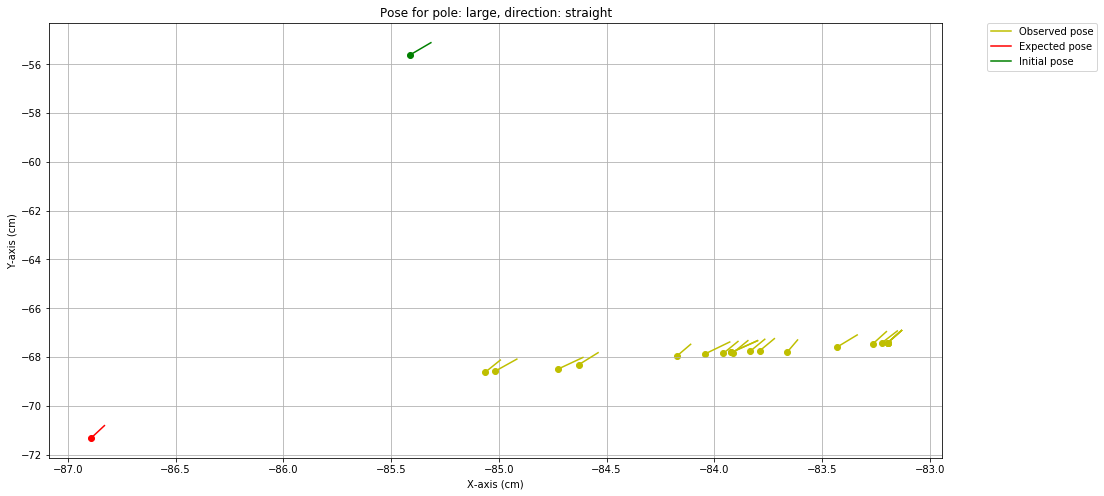

In [167]:
# straight
direction = 'straight'
gt_index = 0

pole = 'small'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'medium'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'large'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

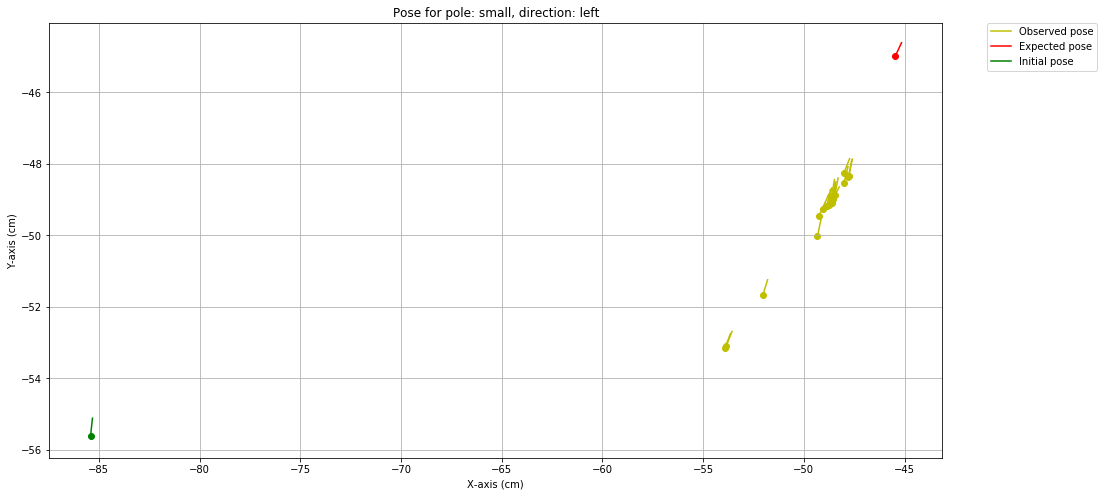

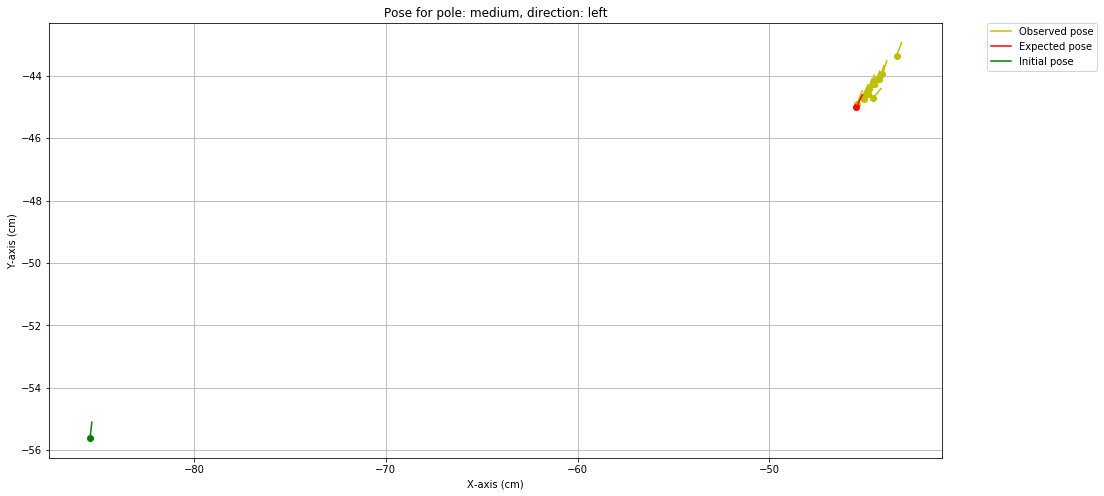

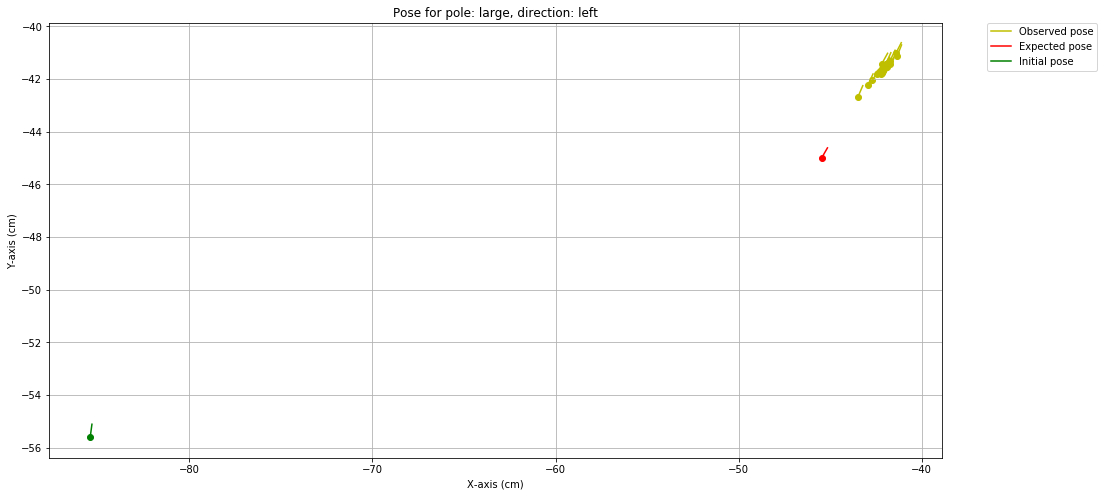

In [168]:
# straight
direction = 'left'
gt_index = 1

pole = 'small'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'medium'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'large'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

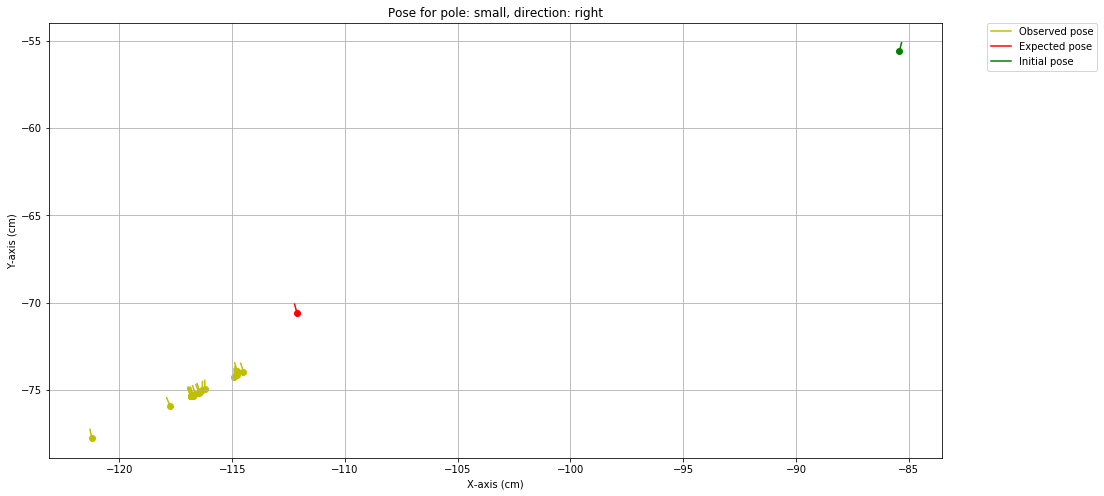

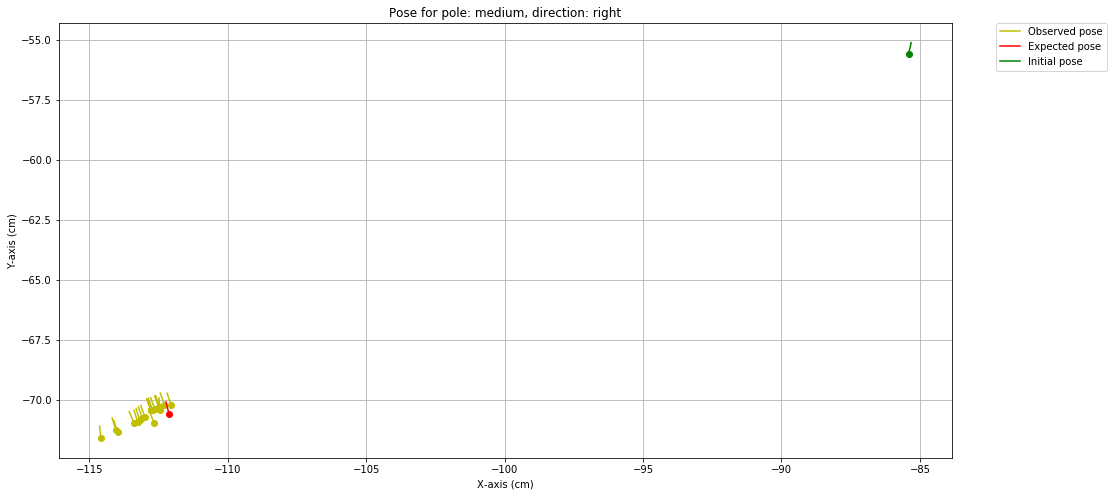

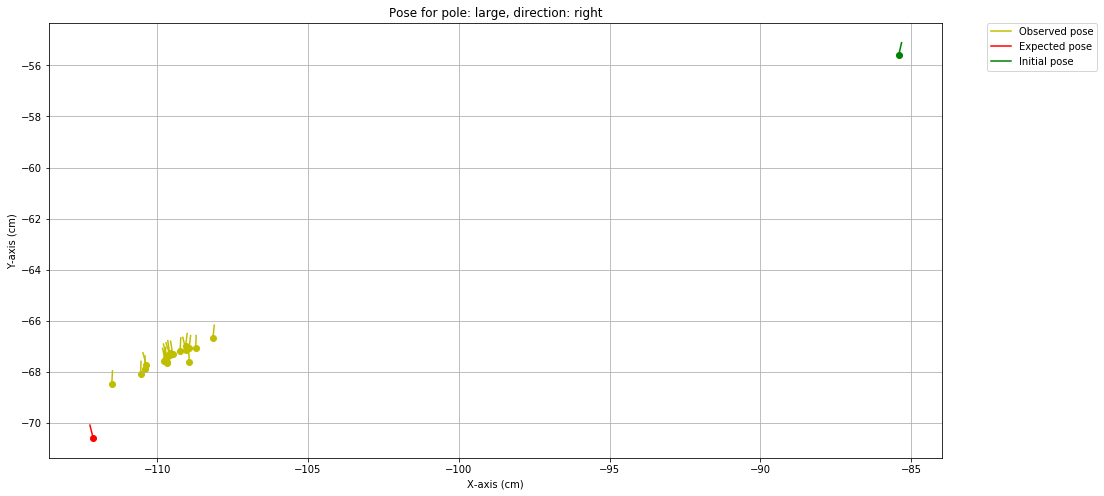

In [170]:
# straight
direction = 'right'
gt_index = 2

pole = 'small'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'medium'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)

pole = 'large'
title = 'Pose for pole: {}, direction: {}'.format(pole, direction)
df = get_measurements(pole, direction)
plot_data(df, (gt[gt_index][0], gt[gt_index][1], gt[gt_index][2]), title)